
# Exploratory Data Analysis for Customer Churn Prediction

This Jupyter Notebook provides the steps for conducting an exploratory data analysis (EDA) on the Telco Customer Churn dataset.

## Import Libraries

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

## Load the Data

```python
# Load the preprocessed dataset
data_path = './processed_telco_churn.csv'
df = pd.read_csv(data_path)
```

## Overview of the Data

```python
# Display the first few rows of the dataframe
df.head()

# Get a concise summary of the dataframe
df.info()

# Describe the statistical characteristics of numerical features
df.describe()
```

## Visualization of Different Aspects

### Distribution of Features

```python
# Plot histograms for numerical features
df.hist(bins=15, figsize=(15, 10))
plt.show()
```

### Box Plots to Identify Outliers

```python
# Box plots for numerical variables to identify outliers
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # example numerical columns
fig, ax = plt.subplots(figsize=(10, 8))
df.boxplot(column=numerical_cols)
plt.show()
```

### Correlations Between Features

```python
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
```

### Scatter Plots to Visualize Relationships

```python
# Scatter plot between 'MonthlyCharges' and 'TotalCharges'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn')
plt.title('Relationship between Monthly Charges and Total Charges')
plt.show()
```

## Identify Trends and Outliers

Identifying potential outliers and trends can be based on visualization and statistical thresholds.

- **Outliers**: Observations in box plots that appear outside of the whiskers can be considered outliers.
- **Trends**: As seen in the scatter plots, check for any visible trends like linear relationships or clusters.



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset

In [2]:
data_path = './processed_telco_churn.csv'
df = pd.read_csv(data_path)

## Overview of the Data

In [3]:
# Display the first few rows of the dataframe
df.head()

# Get a concise summary of the dataframe
df.info()

# Describe the statistical characteristics of numerical features
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,-1.916841e-17,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,-6.204512e-17,8.499677e-17,0.265370
std,0.500013,0.368612,0.499748,0.458110,1.000071e+00,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,1.000071e+00,1.000071e+00,0.441561
min,0.000000,0.000000,0.000000,0.000000,-1.318165e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.545860e+00,-9.998503e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.516817e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-9.725399e-01,-8.305558e-01,0.000000
50%,1.000000,0.000000,0.000000,0.000000,-1.372744e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.857327e-01,-3.897629e-01,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.214551e-01,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,8.338335e-01,6.637555e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.613701e+00,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.794352e+00,2.826469e+00,1.000000


## Visualization of Different Aspects

### Distribution of Features

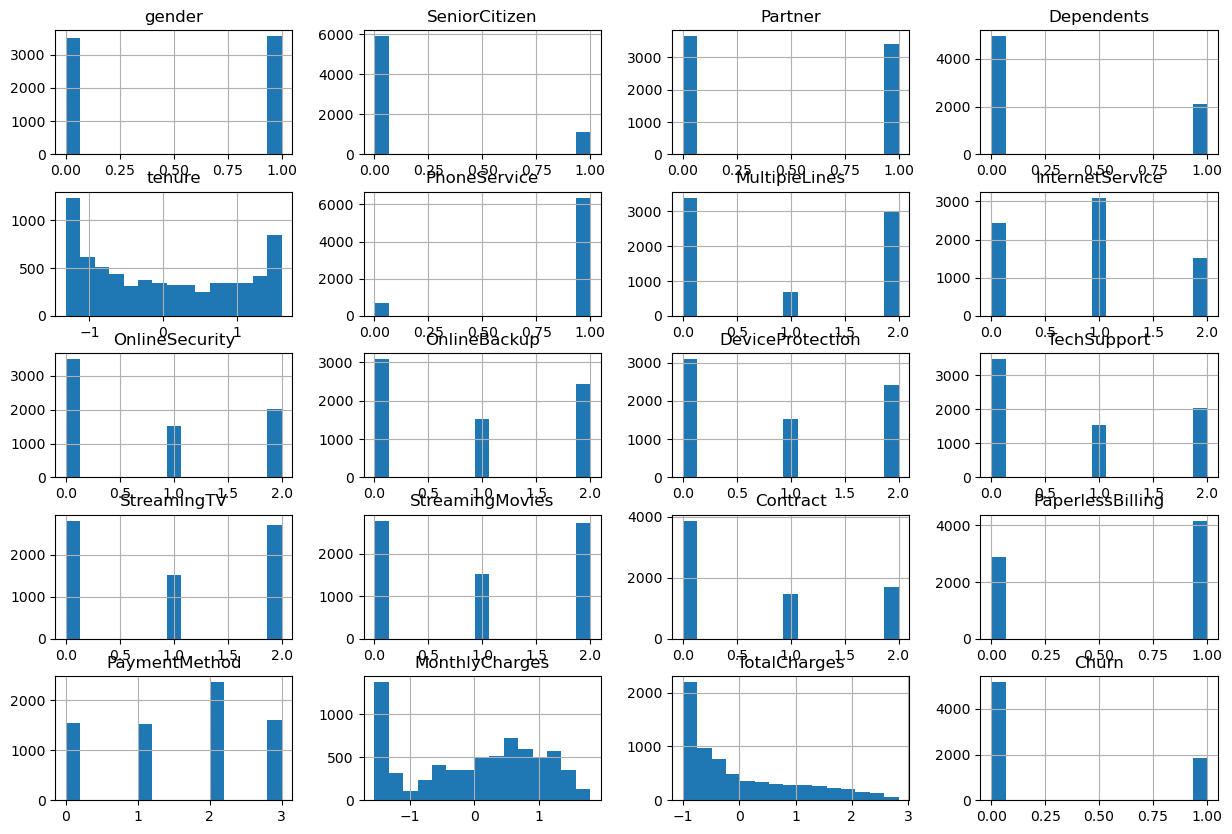

In [4]:
# Plot histograms for numerical features
df.hist(bins=15, figsize=(15, 10))
plt.show()

### Box Plots to Identify Outliers

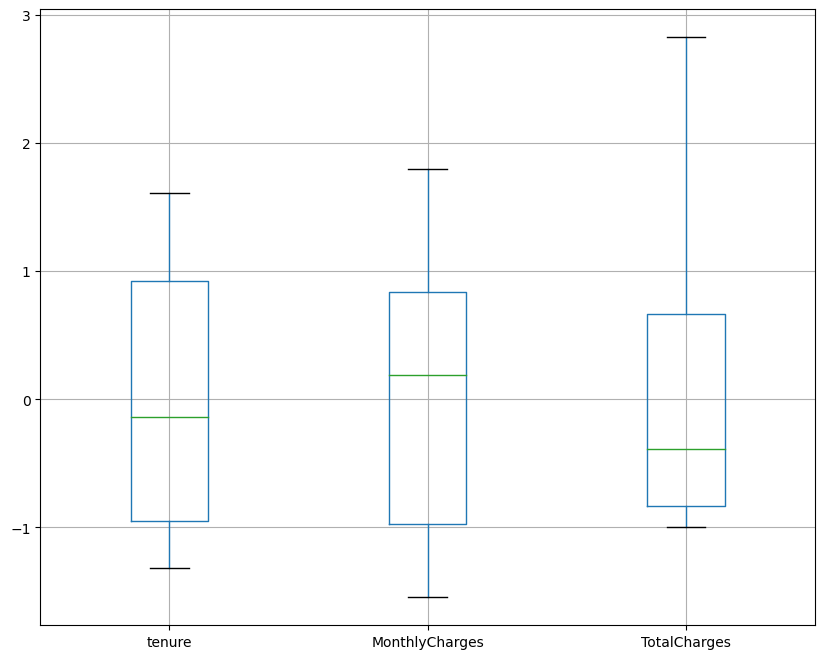

In [5]:
# Box plots for numerical variables to identify outliers
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # example numerical columns
fig, ax = plt.subplots(figsize=(10, 8))
df.boxplot(column=numerical_cols)
plt.show()

### Correlations Between Features

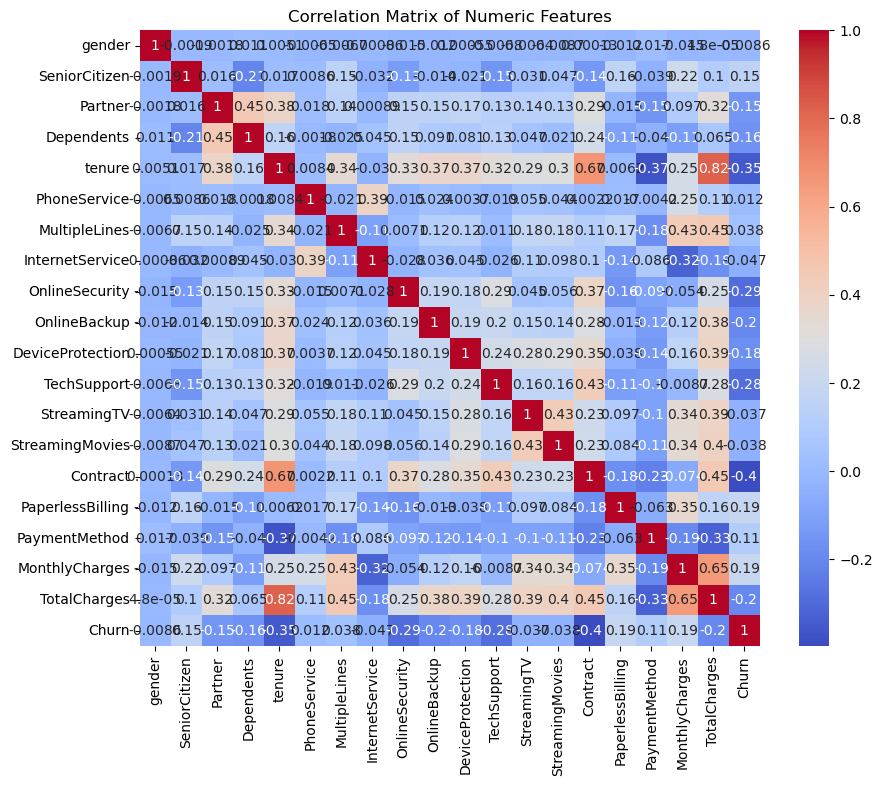

In [6]:
# Correlation matrix
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Scatter Plots to Visualize Relationships

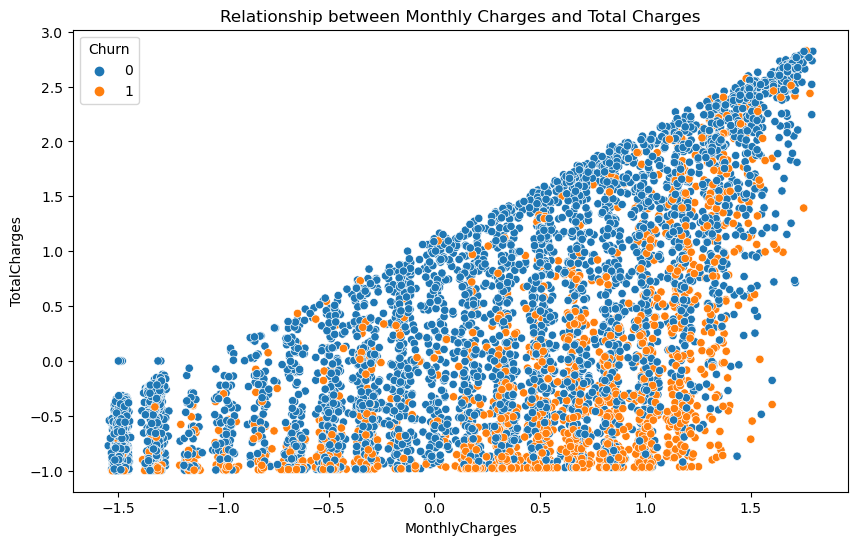

In [7]:
# Scatter plot between 'MonthlyCharges' and 'TotalCharges'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn')
plt.title('Relationship between Monthly Charges and Total Charges')
plt.show()